In [1]:
import os
import torch
import matplotlib.pyplot as plt

## Carga del dataset

In [2]:
from datasets.tusimple import TUSimpleDataset

BATCH_SIZE = 8

# Carga del dataset de entrenamiento
train_dataset = TUSimpleDataset()
train_dataloader = torch.utils.data.DataLoader(train_dataset, BATCH_SIZE, shuffle=False)

## Entrenamiento del modelo

In [3]:
from models.enet import ENet

NUM_EPOCHS = 10

# Creación del modelo ENet
enet_model = ENet(binary_seg=2, embedding_dim=4)

# Configurando el dispositivo con el que se ejecuta el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
enet_model.to(device)

# Definición del optimizador
params = [p for p in enet_model.parameters() if p.requires_grad]
optimizer = torch.optim.Adam(params, lr=0.0005, weight_decay=0.0002)

# Entrenamiento del modelo
binary_losses, _, train_accuracies = enet_model.fit(
    NUM_EPOCHS, train_dataloader, optimizer, device
)

# Guardado del modelo
torch.save(enet_model.state_dict(), os.path.join("saved_models", "enet_model.pth"))

100%|██████████| 402/402 [46:15<00:00,  6.90s/it]


Epoch 1: Binary Loss = 0.1904,Instance Loss = 1.6621,Binary Accuracy = 0.9310


100%|██████████| 402/402 [45:49<00:00,  6.84s/it]


Epoch 2: Binary Loss = 0.0640,Instance Loss = 0.2915,Binary Accuracy = 0.9731


100%|██████████| 402/402 [49:13<00:00,  7.35s/it]


Epoch 3: Binary Loss = 0.0550,Instance Loss = 0.1984,Binary Accuracy = 0.9739


100%|██████████| 402/402 [52:41<00:00,  7.86s/it]


Epoch 4: Binary Loss = 0.0512,Instance Loss = 0.1388,Binary Accuracy = 0.9749


100%|██████████| 402/402 [53:55<00:00,  8.05s/it]


Epoch 5: Binary Loss = 0.0493,Instance Loss = 0.1122,Binary Accuracy = 0.9759


100%|██████████| 402/402 [53:46<00:00,  8.03s/it]


Epoch 6: Binary Loss = 0.0482,Instance Loss = 0.0861,Binary Accuracy = 0.9765


100%|██████████| 402/402 [53:47<00:00,  8.03s/it]


Epoch 7: Binary Loss = 0.0473,Instance Loss = 0.0643,Binary Accuracy = 0.9768


100%|██████████| 402/402 [53:46<00:00,  8.03s/it]


Epoch 8: Binary Loss = 0.0460,Instance Loss = 0.0529,Binary Accuracy = 0.9777


100%|██████████| 402/402 [53:47<00:00,  8.03s/it]


Epoch 9: Binary Loss = 0.0450,Instance Loss = 0.0462,Binary Accuracy = 0.9791


100%|██████████| 402/402 [53:52<00:00,  8.04s/it]


Epoch 10: Binary Loss = 0.0436,Instance Loss = 0.0429,Binary Accuracy = 0.9812


## Testeo del modelo

In [4]:
import numpy as np
from utils import accuracy_score

# Carga del dataset de test
test_dataset = TUSimpleDataset(train=False)

# Testeo del modelo
test_accuracies = []
for img, segmentation_image, instance_target in test_dataset:
	binary_seg, instance_seg = enet_model.predict(img)
	accuracy = accuracy_score(
		segmentation_image.numpy().astype(np.uint8), binary_seg.astype(np.uint8)
	)

	test_accuracies.append(accuracy)

# Promedio de accuracies de test y entrenamiento
test_accuracy = sum(test_accuracies) / len(test_accuracies)
train_accuracy = sum(train_accuracies) / len(train_accuracies)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9720100901020107
Test Accuracy: 0.9764885879144436


Podemos observar que los accuracies son muy similares, por lo tanto no presenta overfitting.

## Gráficas de los resultados

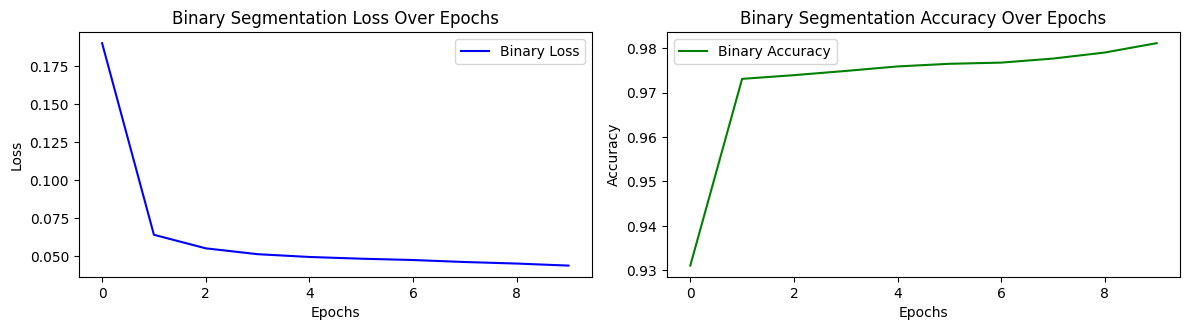

In [7]:
# Gráficas de pérdida y accuracy del entrenamiento por epochs
plt.figure(figsize=(12, 6))

# Gráfica de Binary Segmentation Loss
plt.subplot(2, 2, 1)
plt.plot(range(NUM_EPOCHS), binary_losses, label="Binary Loss", color="b")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Binary Segmentation Loss Over Epochs")
plt.legend()

# Gráfica de Binary Segmentation Accuracy
plt.subplot(2, 2, 2)
plt.plot(range(NUM_EPOCHS), train_accuracies, label="Binary Accuracy", color="g")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Binary Segmentation Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()